# Lab 3
### Averaging Filters

http://scikit-image.org/docs/0.13.x/api/skimage.util.html#skimage.util.random_noise

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.median

http://scikit-image.org/docs/dev/api/skimage.filters.html#skimage.filters.gaussian

In [96]:
from commonfunctions import *
import math
from skimage.filters import gaussian

%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


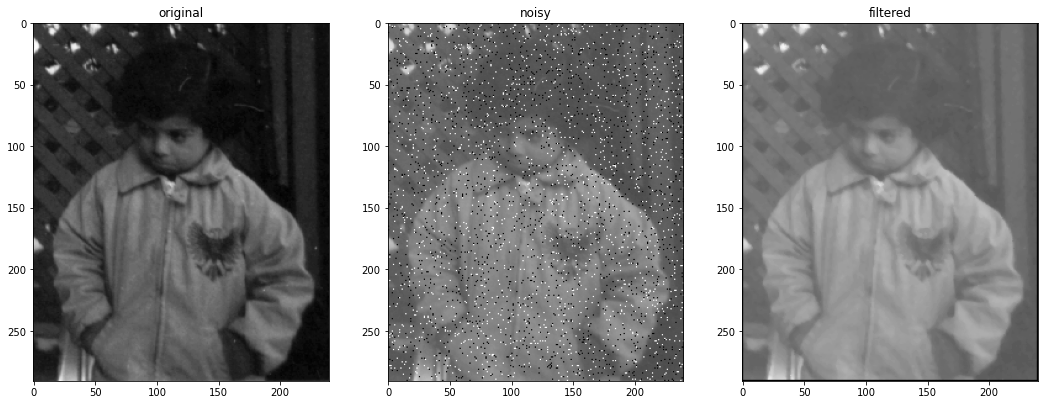

In [92]:
'''
(1) Your own median filter algorithm
'''
def my_filter(image, window_size: tuple):
    img_f = np.copy(image)
    edge_x = window_size[1]//2
    edge_y = window_size[0]//2
    img_out = np.zeros((img_f.shape[0],img_f.shape[1]))
    for x in range(edge_x, img_f.shape[1] - edge_x):
        for y in range(edge_y, img_f.shape[0] - edge_y):
            color_array = np.zeros((window_size[0], window_size[1]))
            for fx in range(window_size[1]):
                for fy in range(window_size[0]):
                    color_array[fy][fx]=img_f[y+fy-edge_x][x+fx-edge_x]
            img_out[y][x] = np.median(color_array)
    return img_out

img = io.imread('pout.tif')
noise_img = random_noise(image=img, mode='s&p', amount=0.05)
#show_images(
#    [img, noise_img, my_filter(np.array(noise_img),(3,3)),my_filter(np.array(noise_img),(5,5))],
#    ["original", "noisy", "filtered","filtered"]
#)
my_filter_img =  my_filter(np.array(noise_img),(3,3))
show_images([img,noise_img,my_filter_img],["original","noisy", "filtered"])
#io.show()

#img2 = io.imread('tire.tif')
#noise_img2 = random_noise(image=img2, mode='s&p', amount=0.05)
#show_images([img2,noise_img2, my_filter(np.array(noise_img2),(3,3))],["original","noisy", "filtered"])

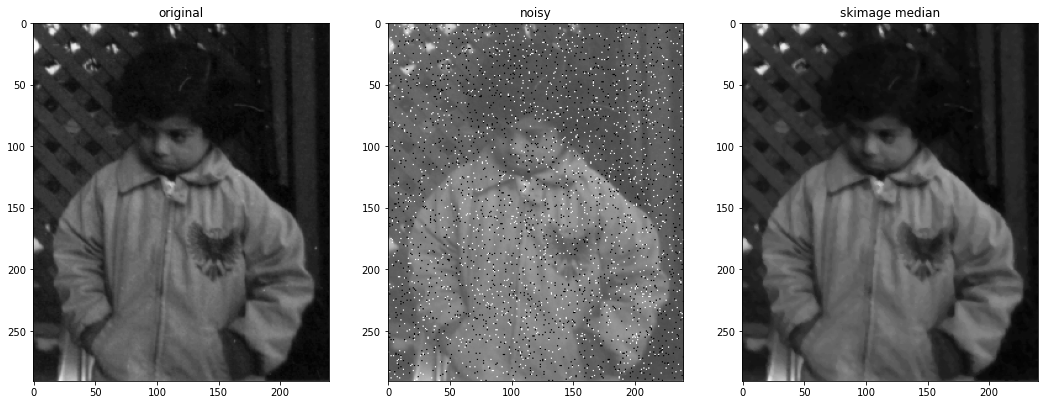

In [97]:
'''
(2) skimage median filter
'''
#from skimage.filters._median import median
#median(s)
img = io.imread('pout.tif')
noise_img = random_noise(image=img, mode='s&p',amount=0.05)
skimage_median = median(noise_img)
show_images([img,noise_img,skimage_median], ["original","noisy","skimage median"])
#io.show()
#show_images([img2,noise_img2,median(noise_img2)], ["original","noisy","skimage median"])

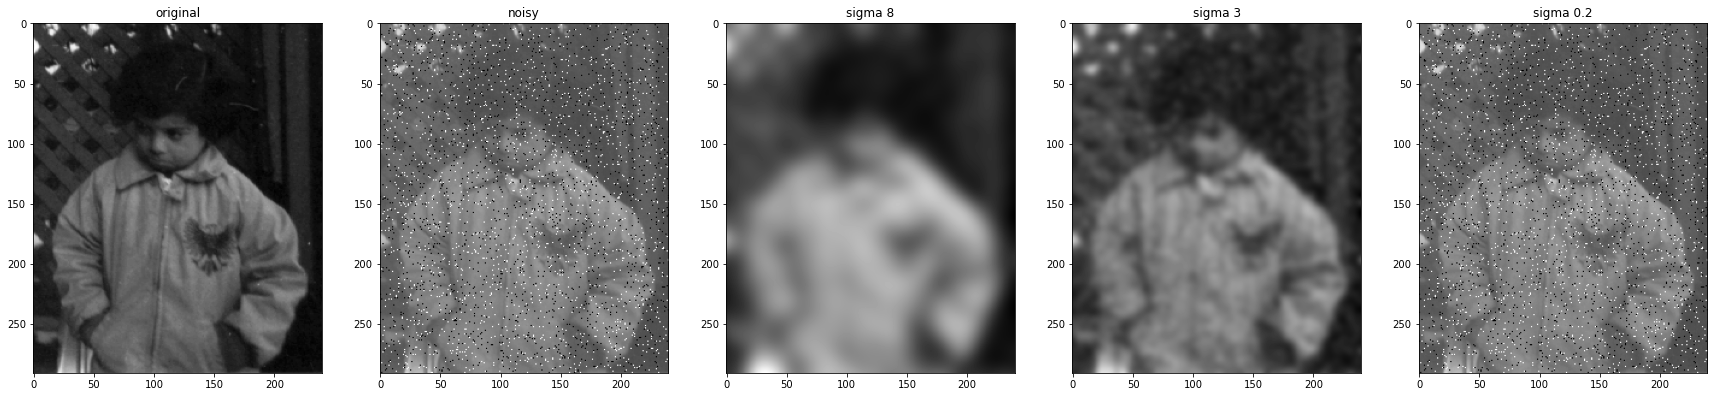

In [85]:
'''
(3) Gaussion Filters
'''

show_images(
    [img,noise_img, gaussian(image=noise_img, sigma=8), gaussian(
        image=noise_img, sigma=3), gaussian(image=noise_img, sigma=0.2)],
    ["original","noisy", "sigma 8", "sigma 3", "sigma 0.2"]
)
